In [69]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

priority, window, num_nodes, ave_sum_stay, se_sum_stay, ave_sum_task, se_sum_task, ave_var_task, se_var_task = np.loadtxt("./data/exp/data", delimiter=',', unpack=True)
print(window)
print(num_nodes)
print(ave_sum_stay)
print(se_sum_stay)

[2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 5. 5. 5. 5. 5.]
[ 1.  2.  4.  8. 12.  1.  2.  4.  8. 12.  1.  2.  4.  8. 12.  1.  2.  4.
  8. 12.]
[1.9933000e+02 6.3311200e+03 2.1545310e+04 6.7270420e+04 1.1146426e+05
 6.2500000e+01 3.6013700e+03 1.9699790e+04 7.1870910e+04 1.1587675e+05
 6.2040000e+01 3.8554000e+03 2.0408070e+04 7.2949220e+04 1.1714594e+05
 6.3050000e+01 3.9820700e+03 2.0854950e+04 7.3345500e+04 1.1729315e+05]
[1.26000e-01 3.92360e+01 1.35335e+02 2.53522e+02 1.91134e+02 4.96000e-01
 5.71190e+01 1.77343e+02 2.35425e+02 1.59071e+02 4.45000e-01 5.77440e+01
 1.86740e+02 2.41356e+02 1.47181e+02 4.62000e-01 5.32500e+01 2.19169e+02
 2.51837e+02 1.23856e+02]


Text(0,0.5,'sum of stay')

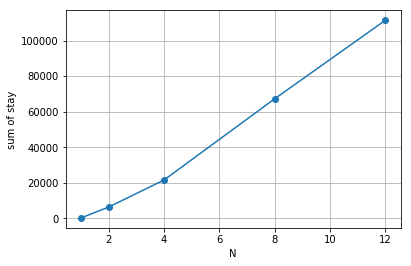

In [5]:
plt.plot(num_nodes, ave_sum_stay, marker="o")
plt.grid()
plt.xlabel('N')
plt.ylabel('sum of stay')

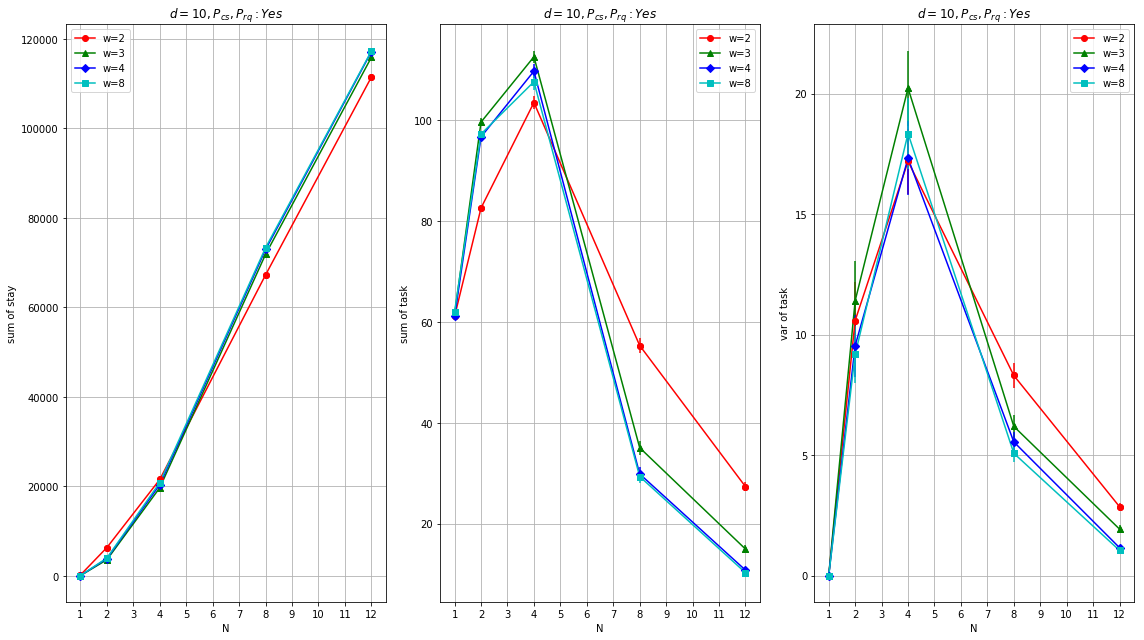

In [73]:
MAX_NUM_NODES = 12
WINDOW_SIZES = ['2', '3', '4', '8', '12']
NUM_TYPE_NUM_NODES = 5 # 2, 3, 4, 8, 12 -> 5 types
NUM_WINDOW_SIZE = 4

COLORS = ["r", "g", "b", "c", "m", "y", "k", "w"]
MARKERS = ['o', '^', 'D', 's', 'v']

plt.figure(figsize=(16, 9))

def data_plot(xdata, ydata, errdata, ylabel, title='$d=10, P_{cs}, P_{rq}: Yes$', xlabel='N'):
    """
    Plot graph with xdata and ydata.
    The second param errdata represents yerror.
    """
    for i in range(NUM_WINDOW_SIZE):
        x = xdata[NUM_TYPE_NUM_NODES*i:NUM_TYPE_NUM_NODES*(i+1)]
        y = ydata[NUM_TYPE_NUM_NODES*i:NUM_TYPE_NUM_NODES*(i+1)]
        err = errdata[NUM_TYPE_NUM_NODES*i:NUM_TYPE_NUM_NODES*(i+1)]
        plt.errorbar(x, y, yerr=err, fmt=COLORS[i]+MARKERS[i], ecolor=COLORS[i])
        plt.plot(x, y, marker=MARKERS[i], color=COLORS[i], label='w='+WINDOW_SIZES[i])
    
    plt.title('$d=10, P_{cs}, P_{rq}: Yes$')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(1, MAX_NUM_NODES+1, 1.0))
    plt.grid()
    plt.legend()

plt.subplot(1, 3, 1)
data_plot(num_nodes, ave_sum_stay, se_sum_stay, 'sum of stay')

plt.subplot(1, 3, 2)
data_plot(num_nodes, ave_sum_task, se_sum_task, 'sum of task')

plt.subplot(1, 3, 3)
data_plot(num_nodes, ave_var_task, se_var_task, 'var of task')

plt.tight_layout()